In [0]:
print(sc.version)
print(sc.pythonVer)
print(sc.master)

3.1.1
3.8
local[8]

In [0]:
numb = range(1, 100)
spark_data = sc.parallelize(numb)

In [0]:
textfile = sc.textFile("README.md")
print(textfile)

README.md MapPartitionsRDD[5] at textFile at NativeMethodAccessorImpl.java:0

In [0]:
my_list = [1,2,3,4,5]
mapping = list(map(lambda x: x * 2 , my_list))
print(mapping)

[2, 4, 6, 8, 10]

In [0]:
my_list2 = [10,15,20,25,30,35]
filtering = list(filter(lambda x: (x%10 == 0), my_list2))
print(filtering)

[10, 20, 30]

In [0]:
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>

In [0]:
file_path = "/FileStore/tables/Readme.md"
print("The file_path is", file_path)
fileRDD = sc.textFile(file_path)
print("The file type of fileRDD is", type(fileRDD))

The file_path is /FileStore/tables/Readme.md
The file type of fileRDD is <class 'pyspark.rdd.RDD'>

In [0]:
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())
fileRDD_part = sc.textFile(file_path, minPartitions = 5)
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5

In [0]:
num_RDD = sc.parallelize([1,2,3,4])
cubedRDD = num_RDD.map(lambda x: x * x * x)
numbers_all = cubedRDD.collect()
print(numbers_all)

[1, 8, 27, 64]

In [0]:
fileRDD = sc.textFile("/FileStore/tables/spark.txt")
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in line)
print(fileRDD_filter.count())
for line in fileRDD_filter.take(4):
  print(line)

4
sparkSince its release, Apache Spark, the unified analytics engine, has seen rapid adoption by enterprises across a wide range of industries. 
Internet powerhouses such as Netflix, Yahoo, and eBay have deployed Spark at massive scale, collectively processing multiple petabytes of data on clusters of over 8,000 nodes. 
The team that started the Spark research project at UC Berkeley founded Databricks in 2013.
Apache Spark is a lightning-fast unified analytics engine for big data and machine learning.

In [0]:
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x+y)
for num in Rdd_Reduced.collect():
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts

In [0]:
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts

In [0]:
total = Rdd.countByKey()
print("The type of total is", type(total))
for k, v in total.items():
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts

In [0]:
baseRDD = sc.textFile(file_path)
splitRDD = baseRDD.flatMap(lambda x: x.split())
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 44

In [0]:
stop_words = [',','.',';',':']
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

In [0]:
for word in resultRDD.take(10):
  print(word)

resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

for word in resultRDD_swap_sort.take(10):
  print("{} has {} counts". format(word[1], word[0]))

('#', 1)
('Analyzing', 2)
('Cleveland', 2)
('Disease', 2)
('Dataset.rmd', 1)
('source', 1)
('Mathematical', 1)
('modeling.', 1)
('heart.csv', 1)
('is', 2)
the has 4 counts
for has 3 counts
data has 3 counts
Analyzing has 2 counts
Cleveland has 2 counts
Disease has 2 counts
is has 2 counts
Heart has 2 counts
# has 1 counts
Dataset.rmd has 1 counts

In [0]:
sample_list = [('Mona',20), ('Jennifer',34), ('John',20), ('Jim',26)]
rdd = sc.parallelize(sample_list)
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>

In [0]:
file_path = "/FileStore/tables/people.csv"
people_df = spark.read.csv(file_path, header=True, inferSchema=True)
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>

In [0]:
people_df.show(10)
print(people_df.count())
print(len(people_df.columns))

+---+---------+----------------+------+-------------+
_c0|person_id| name| sex|date of birth|
+---+---------+----------------+------+-------------+
 0| 100| Penelope Lewis|female| 1990-08-31|
 1| 101| David Anthony| male| 1971-10-14|
 2| 102| Ida Shipp|female| 1962-05-24|
 3| 103| Joanna Moore|female| 2017-03-10|
 4| 104| Lisandra Ortiz|female| 2020-08-05|
 5| 105| David Simmons| male| 1999-12-30|
 6| 106| Edward Hudson| male| 1983-05-09|
 7| 107| Albert Jones| male| 1990-09-13|
 8| 108|Leonard Cavender| male| 1958-08-08|
 9| 109| Everett Vadala| male| 2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

100000
5

In [0]:
people_df_sub = people_df.select("name","sex","date of birth")
people_df_sub.show(10)
people_df_sub_nodup = people_df_sub.dropDuplicates()
print(people_df_sub.count())
print(people_df_sub_nodup.count())

+----------------+------+-------------+
 name| sex|date of birth|
+----------------+------+-------------+
 Penelope Lewis|female| 1990-08-31|
 David Anthony| male| 1971-10-14|
 Ida Shipp|female| 1962-05-24|
 Joanna Moore|female| 2017-03-10|
 Lisandra Ortiz|female| 2020-08-05|
 David Simmons| male| 1999-12-30|
 Edward Hudson| male| 1983-05-09|
 Albert Jones| male| 1990-09-13|
Leonard Cavender| male| 1958-08-08|
 Everett Vadala| male| 2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

100000
99998

In [0]:
people_df_female = people_df.filter(people_df.sex == "female")
people_df_male = people_df.filter(people_df.sex == "male")
print("Female count : ",people_df_female.count())
print("Male count : ",people_df_male.count())

Female count : 49014
Male count : 49066

In [0]:
people_df.createOrReplaceTempView("people")
people_df_names = spark.sql("SELECT name FROM people")
people_df_names.show(10)

+----------------+
 name|
+----------------+
 Penelope Lewis|
 David Anthony|
 Ida Shipp|
 Joanna Moore|
 Lisandra Ortiz|
 David Simmons|
 Edward Hudson|
 Albert Jones|
Leonard Cavender|
 Everett Vadala|
+----------------+
only showing top 10 rows

In [0]:
people_df_female = spark.sql("SELECT * from people WHERE sex= 'female'")
people_df_male =  spark.sql("SELECT * from people WHERE sex= 'male'")
print("Female count : ",people_df_female.count())
print("Male count : ",people_df_male.count())

Female count : 49014
Male count : 49066

['Name', 'Age']
Out[34]:

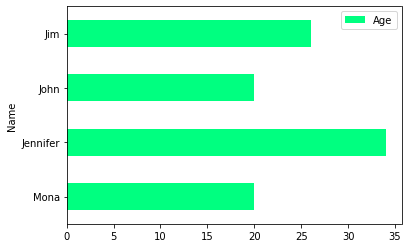

<matplotlib.axes._subplots.AxesSubplot at 0x7f3af823e160>

In [0]:
print(names_df.columns)
df_pandas = names_df.toPandas()
df_pandas.plot(kind='barh', x='Name', y='Age',colormap='winter_r')

In [0]:
file_path = "/FileStore/tables/Fifa2018_dataset.csv"
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)
fifa_df.printSchema()
fifa_df.show(10)
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
-- _c0: integer (nullable = true)
-- Name: string (nullable = true)
-- Age: integer (nullable = true)
-- Photo: string (nullable = true)
-- Nationality: string (nullable = true)
-- Flag: string (nullable = true)
-- Overall: integer (nullable = true)
-- Potential: integer (nullable = true)
-- Club: string (nullable = true)
-- Club Logo: string (nullable = true)
-- Value: string (nullable = true)
-- Wage: string (nullable = true)
-- Special: integer (nullable = true)
-- Acceleration: string (nullable = true)
-- Aggression: string (nullable = true)
-- Agility: string (nullable = true)
-- Balance: string (nullable = true)
-- Ball control: string (nullable = true)
-- Composure: string (nullable = true)
-- Crossing: string (nullable = true)
-- Curve: string (nullable = true)
-- Dribbling: string (nullable = true)
-- Finishing: string (nullable = true)
-- Free kick accuracy: string (nullable = true)
-- GK diving: string (nullable = true)
-- GK handling: string (nullable = true)
-- GK kicking: string (nullable = true)
-- GK positioning: string (nullable = true)
-- GK reflexes: string (nullable = true)
-- Heading accuracy: string (nullable = true)
-- Interceptions: string (nullable = true)
-- Jumping: string (nullable = true)
-- Long passing: string (nullable = true)
-- Long shots: string (nullable = true)
-- Marking: string (nullable = true)
-- Penalties: string (nullable = true)
-- Positioning: string (nullable = true)
-- Reactions: string (nullable = true)
-- Short passing: string (nullable = true)
-- Shot power: string (nullable = true)
-- Sliding tackle: string (nullable = true)
-- Sprint speed: string (nullable = true)
-- Stamina: string (nullable = true)
-- Standing tackle: string (nullable = true)
-- Strength: string (nullable = true)
-- Vision: string (nullable = true)
-- Volleys: string (nullable = true)
-- CAM: double (nullable = true)
-- CB: double (nullable = true)
-- CDM: double (nullable = true)
-- CF: double (nullable = true)
-- CM: double (nullable = true)
-- ID: integer (nullable = true)
-- LAM: double (nullable = true)
-- LB: double (nullable = true)
-- LCB: double (nullable = true)
-- LCM: double (nullable = true)
-- LDM: double (nullable = true)
-- LF: double (nullable = true)
-- LM: double (nullable = true)
-- LS: double (nullable = true)
-- LW: double (nullable = true)
-- LWB: double (nullable = true)
-- Preferred Positions: string (nullable = true)
-- RAM: double (nullable = true)
-- RB: double (nullable = true)
-- RCB: double (nullable = true)
-- RCM: double (nullable = true)
-- RDM: double (nullable = true)
-- RF: double (nullable = true)
-- RM: double (nullable = true)
-- RS: double (nullable = true)
-- RW: double (nullable = true)
-- RWB: double (nullable = true)
-- ST: double (nullable = true)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
_c0| Name|Age| Photo|Nationality| Flag|Overall|Potential| Club| Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|Long shots|Marking|Penalties|Positioning|Reactions|Short passing|Shot power|Sliding tackle|Sprint speed|Stamina|Standing tackle|Strength|Vision|Volleys| CAM| CB| CDM| CF| CM| ID| LAM| LB| LCB| LCM| LDM| LF| 

In [0]:
fifa_df.createOrReplaceTempView('fifa_df_table')
query = "SELECT Age FROM fifa_df_table WHERE Nationality == 'Germany'"
fifa_df_germany_age = spark.sql(query)
fifa_df_germany_age.describe().show()

+-------+-----------------+
summary| Age|
+-------+-----------------+
 count| 1140|
 mean|24.20263157894737|
 stddev|4.197096712293752|
 min| 16|
 max| 36|
+-------+-----------------+

Out[37]:

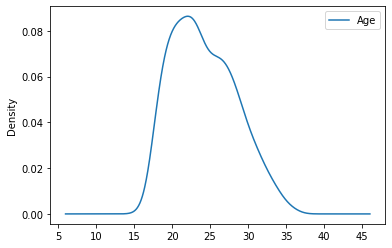

<matplotlib.axes._subplots.AxesSubplot at 0x7f3af6938460>

In [0]:
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()
fifa_df_germany_age_pandas.plot(kind='density')

In [0]:
from pyspark.mllib.recommendation import ALS
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.clustering import KMeans

In [0]:
file_path = "/FileStore/tables/ratings.csv"
data = sc.textFile(file_path)
ratings = data.map(lambda l: l.split(','))
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])
type(training_data)

Out[56]: pyspark.rdd.PipelinedRDD

In [0]:
model = ALS.train(training_data,rank=10,iterations=10)
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata_no_rating)
predictions.take(2)

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1735170817424004> in <module> 
 ----> 1 model = ALS . train ( training_data , rank = 10 , iterations = 10 ) 
 2 testdata_no_rating = test_data . map ( lambda p : ( p [ 0 ] , p [ 1 ] ) ) 
 3 predictions = model . predictAll ( testdata_no_rating ) 
 4 predictions . take ( 2 ) 

 /databricks/spark/python/pyspark/mllib/recommendation.py in train (cls, ratings, rank, iterations, lambda_, blocks, nonnegative, seed) 
 278 ( default : None ) 
 279 """
 --> 280 model = callMLlibFunc("trainALSModel", cls._prepare(ratings), rank, iterations,
 281 lambda_, blocks, nonnegative, seed)
 282 return MatrixFactorizationModel ( model ) 

 /databricks/spark/python/pyspark/mllib/recommendation.py in _prepare (cls, ratings) 
 232 raise TypeError("Ratings should be represented by either an RDD or a DataFrame, "
 233 "but got %s." % type(ratings))
 --> 234 first = ratings . first ( ) 
 235 if isinstance ( first , Rating ) : 
 236 pass 

 /databricks/spark/python/pyspark/rdd.py in first (self) 
 1619 ValueError : RDD is empty
 1620 """
 -> 1621 rs = self . take ( 1 ) 
 1622 if rs : 
 1623 return rs [ 0 ] 

 /databricks/spark/python/pyspark/rdd.py in take (self, num) 
 1599 
 1600 p = range ( partsScanned , min ( partsScanned + numPartsToTry , totalParts ) ) 
 -> 1601 res = self . context . runJob ( self , takeUpToNumLeft , p ) 
 1602 
 1603 items += res

 /databricks/spark/python/pyspark/context.py in runJob (self, rdd, partitionFunc, partitions, allowLocal) 
 1339 finally : 
 1340 os . remove ( filename ) 
 -> 1341 sock_info = self . _jvm . PythonRDD . runJob ( self . _jsc . sc ( ) , mappedRDD . _jrdd , partitions ) 
 1342 return list ( _load_from_socket ( sock_info , mappedRDD . _jrdd_deserializer ) ) 
 1343 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 81.0 failed 1 times, most recent failure: Lost task 0.0 in stage 81.0 (TID 147) (ip-10-172-193-240.us-west-2.compute.internal executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'Rating' is not defined', from <command-1735170817424003>, line 4. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 713, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 705, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 267, in dump_stream
 vs = list(itertools.islice(iterator, batch))
 File "/databricks/spark/python/pyspark/rdd.py", line 1595, in takeUpToNumLeft
 yield next(iterator)
 File "/databricks/spark/python/pyspark/rddsampler.py", line 95, in func
 for obj in iterator:
 File "/databricks/spark/python/pyspark/util.py", line 72, in wrapper
 return f(*args, **kwargs)
 File "<command-1735170817424003>", line 4, in <lambda>
NameError: name 'Rating' is not defined

	at

In [0]:
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))
rates_and_preds = rates.join(preds)
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1735170817424005> in <module> 
 1 rates = ratings_final . map ( lambda r : ( ( r [ 0 ] , r [ 1 ] ) , r [ 2 ] ) ) 
 ----> 2 preds = predictions . map ( lambda r : ( ( r [ 0 ] , r [ 1 ] ) , r [ 2 ] ) ) 
 3 rates_and_preds = rates . join ( preds ) 
 4 MSE = rates_and_preds . map ( lambda r : ( r [ 1 ] [ 0 ] - r [ 1 ] [ 1 ] ) ** 2 ) . mean ( ) 
 5 print ( "Mean Squared Error of the model for the test data = {:.2f}" . format ( MSE ) ) 

 NameError : name 'predictions' is not defined

In [0]:
file_path_spam = "/FileStore/tables/spam.txt"
file_path_non_spam = "/FileStore/tables/ham.txt"
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

The first element in spam_words is You
The first element in non_spam_words is Rofl.

In [0]:
from pyspark.mllib.feature import HashingTF
tf = HashingTF(numFeatures=200)
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))
samples = spam_samples.join(non_spam_samples)

In [0]:
train_samples,test_samples = samples.randomSplit([0.8, 0.2])
model = LogisticRegressionWithLBFGS.train(train_samples)
predictions = model.predict(test_samples.map(lambda x: x.features))
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1735170817424008> in <module> 
 1 train_samples , test_samples = samples . randomSplit ( [ 0.8 , 0.2 ] ) 
 ----> 2 model = LogisticRegressionWithLBFGS . train ( train_samples ) 
 3 predictions = model . predict ( test_samples . map ( lambda x : x . features ) ) 
 4 labels_and_preds = test_samples . map ( lambda x : x . label ) . zip ( predictions ) 
 5 accuracy = labels_and_preds . filter ( lambda x : x [ 0 ] == x [ 1 ] ) . count ( ) / float ( test_samples . count ( ) ) 

 /databricks/spark/python/pyspark/mllib/classification.py in train (cls, data, iterations, initialWeights, regParam, regType, intercept, corrections, tolerance, validateData, numClasses) 
 413 if initialWeights is None : 
 414 if numClasses == 2 : 
 --> 415 initialWeights = [ 0.0 ] * len ( data . first ( ) . features ) 
 416 else : 
 417 if intercept : 

 /databricks/spark/python/pyspark/rdd.py in first (self) 
 1619 ValueError : RDD is empty
 1620 """
 -> 1621 rs = self . take ( 1 ) 
 1622 if rs : 
 1623 return rs [ 0 ] 

 /databricks/spark/python/pyspark/rdd.py in take (self, num) 
 1599 
 1600 p = range ( partsScanned , min ( partsScanned + numPartsToTry , totalParts ) ) 
 -> 1601 res = self . context . runJob ( self , takeUpToNumLeft , p ) 
 1602 
 1603 items += res

 /databricks/spark/python/pyspark/context.py in runJob (self, rdd, partitionFunc, partitions, allowLocal) 
 1339 finally : 
 1340 os . remove ( filename ) 
 -> 1341 sock_info = self . _jvm . PythonRDD . runJob ( self . _jsc . sc ( ) , mappedRDD . _jrdd , partitions ) 
 1342 return list ( _load_from_socket ( sock_info , mappedRDD . _jrdd_deserializer ) ) 
 1343 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 84.0 failed 1 times, most recent failure: Lost task 3.0 in stage 84.0 (TID 153) (ip-10-172-193-240.us-west-2.compute.internal executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'LabeledPoint' is not defined', from <command-1735170817424007>, line 7. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 713, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 705, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 267, in dump_stream
 vs = list(itertools.islice(iterator, batch))
 File "/databricks/spark/python/pyspark/util.py", line 72, in wrapper
 return f(*args, **kwargs)
 File "<command-1735170817424007>", line 7, in <lambda>
NameError: name 'LabeledPoint' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:661)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:813)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:795)
	at or

In [0]:
file_path = "/FileStore/tables/5000_points.txt"
clusterRDD = sc.textFile(file_path)
rdd_split = clusterRDD.map(lambda x: x.split('\t'))
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 5000 rows in the rdd_split_int dataset

In [0]:
for clst in range(13, 17):
  model = KMeans.train(rdd_split_int, clst, seed=1)
  WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
  print("The cluster {} hasWithin Set Sum of Squared Error {}".format(clst,WSSSE))

model = KMeans.train(rdd_split_int, k=15, seed=1)
cluster_centers = model.clusterCenters

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-1735170817424010> in <module> 
 1 for clst in range ( 13 , 17 ) : 
 2 model = KMeans . train ( rdd_split_int , clst , seed = 1 ) 
 ----> 3 WSSSE = rdd_split_int . map ( lambda point : error ( point ) ) . reduce ( lambda x , y : x + y ) 
 4 print ( "The cluster {} hasWithin Set Sum of Squared Error {}" . format ( clst , WSSSE ) ) 

 /databricks/spark/python/pyspark/rdd.py in reduce (self, f) 
 1030 yield reduce ( f , iterator , initial ) 
 1031 
 -> 1032 vals = self . mapPartitions ( func ) . collect ( ) 
 1033 if vals : 
 1034 return reduce ( f , vals ) 

 /databricks/spark/python/pyspark/rdd.py in collect (self) 
 965 # Default path used in OSS Spark / for non-credential passthrough clusters: 
 966 with SCCallSiteSync ( self . context ) as css : 
 --> 967 sock_info = self . ctx . _jvm . PythonRDD . collectAndServe ( self . _jrdd . rdd ( ) ) 
 968 return list ( _load_from_socket ( sock_info , self . _jrdd_deserializer ) ) 
 969 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 115.0 failed 1 times, most recent failure: Lost task 0.0 in stage 115.0 (TID 211) (ip-10-172-193-240.us-west-2.compute.internal executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'error' is not defined', from <command-1735170817424010>, line 3. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 713, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 705, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 267, in dump_stream
 vs = list(itertools.islice(iterator, batch))
 File "/databricks/spark/python/pyspark/rdd.py", line 1027, in func
 initial = next(iterator)
 File "/databricks/spark/python/pyspark/util.py", line 72, in wrapper
 return f(*args, **kwargs)
 File "<command-1735170817424010>", line 3, in <lambda>
NameError: name 'error' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:661)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:813)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:795)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:614)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:

In [0]:
import pandas as pd
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"], color="red", marker="x")
plt.show()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1735170817424011> in <module> 
 2 rdd_split_int_df = spark . createDataFrame ( rdd_split_int , schema = [ "col1" , "col2" ] ) 
 3 rdd_split_int_df_pandas = rdd_split_int_df . toPandas ( ) 
 ----> 4 cluster_centers_pandas = pd . DataFrame ( cluster_centers , columns = [ "col1" , "col2" ] ) 
 5 plt . scatter ( rdd_split_int_df_pandas [ "col1" ] , rdd_split_int_df_pandas [ "col2" ] ) 
 6 plt . scatter ( rdd_split_int_df_pandas [ "col1" ] , rdd_split_int_df_pandas [ "col2" ] , color = "red" , marker = "x" ) 

 NameError : name 'cluster_centers' is not defined